# Problem Set 1

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

### Question 1: On Plots and Regression Planes

#### 1). Use matplotlib to visualize the relationship between price and horsepower and body style. Price is the dependent variable. Consider both the "log()" and "^2" transformations of price as dependent variables. Does the body style variable appear to be relevant for car prices, above and beyond horsepower?

In [48]:
carData = pd.read_csv('imports-85.csv')
carData = carData[carData["horsepower"].notna()]
carData = carData[carData["price"].notna()]
carData["price-log"] = np.log(carData["price"])
carData["price-squared"] = carData["price"]**2

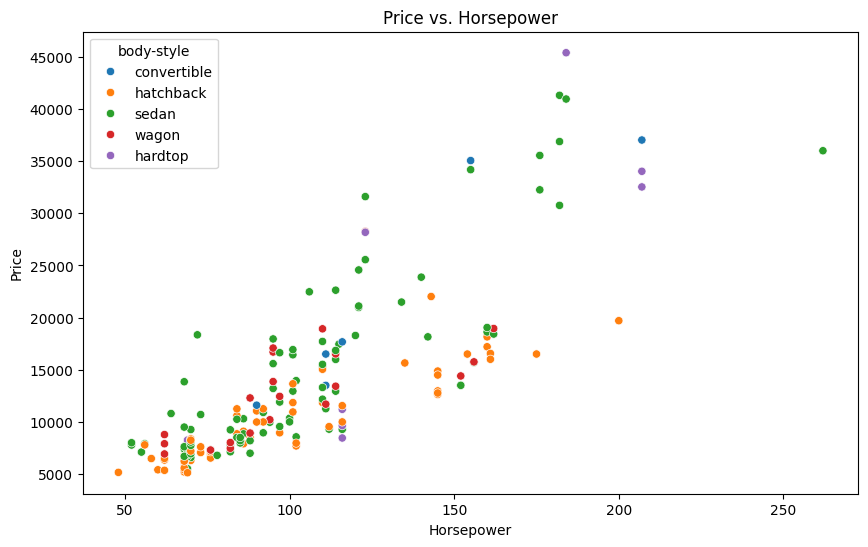

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.scatterplot(
    x = "horsepower",
    y = "price",
    data = carData,
    color = "blue",
    hue = "body-style")

ax.set(
    xlabel = 'Horsepower',
    ylabel = 'Price',
    title = "Price vs. Horsepower");

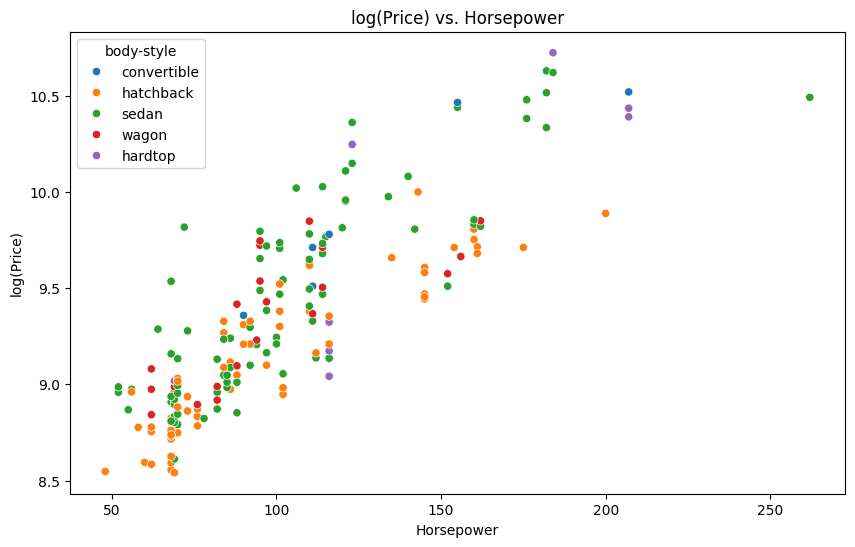

In [51]:
plt.figure(figsize=(10,6))
ax=sns.scatterplot(
    x = "horsepower",
    y = "price-log",
    data = carData,
    color = "blue",
    hue = "body-style")

ax.set(
    xlabel = 'Horsepower',
    ylabel = 'log(Price)',
    title = "log(Price) vs. Horsepower");

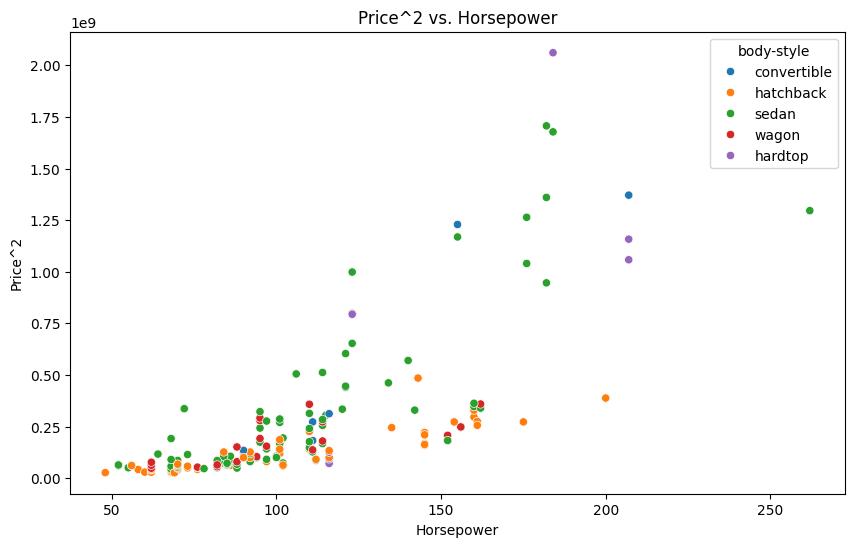

In [52]:
plt.figure(figsize=(10,6))
ax=sns.scatterplot(
    x = "horsepower",
    y = "price-squared",
    data = carData,
    color = "blue",
    hue = "body-style")

ax.set(
    xlabel = 'Horsepower',
    ylabel = 'Price^2',
    title = "Price^2 vs. Horsepower");

The body style variable does appear to be relevant for car prices, but not over horsepower. This is made more obvious in the price^2 vs. horsepower graph, where the vast majority of cars are tightly scattered in the bottom, and a few expensive cars are at the top, but we see that there are high horsepower cars even in the lower price region.

#### 2). Run a regression of your preferred specification. Perform residual diagnostics as you learned in Econometrics. What do you conclude from your regression diagnostic plots of residuals vs. fitted and residuals vs. horsepower? (Hint: You may want to use a seaborn_qqplot and scipy.stats packages for qqplot)

In [53]:
horsepower = carData[["horsepower"]]
horsepower = sm.add_constant(horsepower)
price = carData["price-log"]

regressionPrice = sm.OLS(price, horsepower).fit()
print(regressionPrice.summary())

                            OLS Regression Results                            
Dep. Variable:              price-log   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     446.9
Date:                Sun, 06 Apr 2025   Prob (F-statistic):           1.47e-52
Time:                        19:49:16   Log-Likelihood:                -27.845
No. Observations:                 199   AIC:                             59.69
Df Residuals:                     197   BIC:                             66.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1949      0.058    140.772      0.0

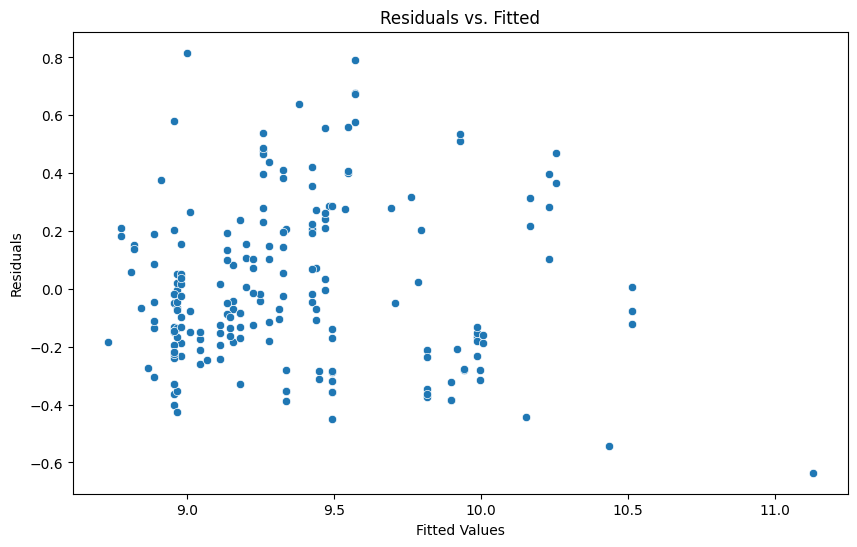

In [54]:
residuals = regressionPrice.resid
fitted = regressionPrice.fittedvalues

plt.figure(figsize=(10,6))
sns.scatterplot(x=fitted, y=residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted")
plt.show()

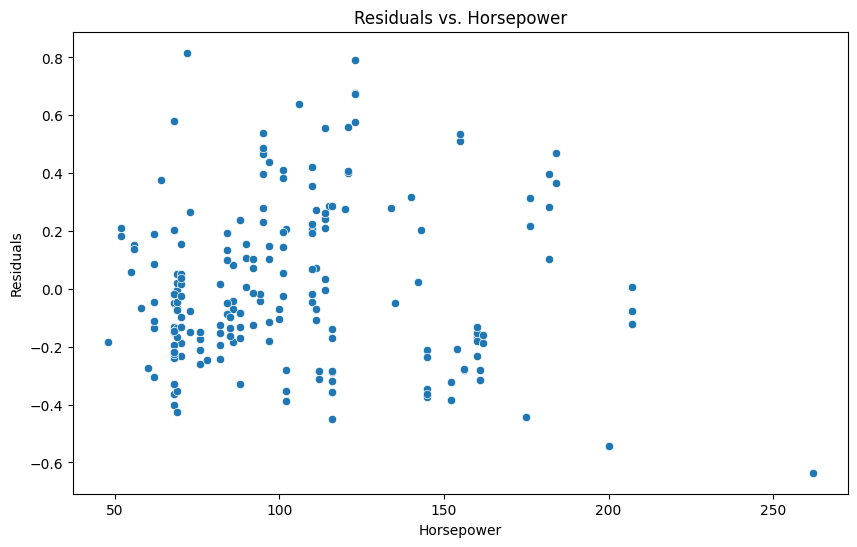

In [55]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=carData["horsepower"], y=residuals)
plt.xlabel("Horsepower")
plt.ylabel("Residuals")
plt.title("Residuals vs. Horsepower")
plt.show()

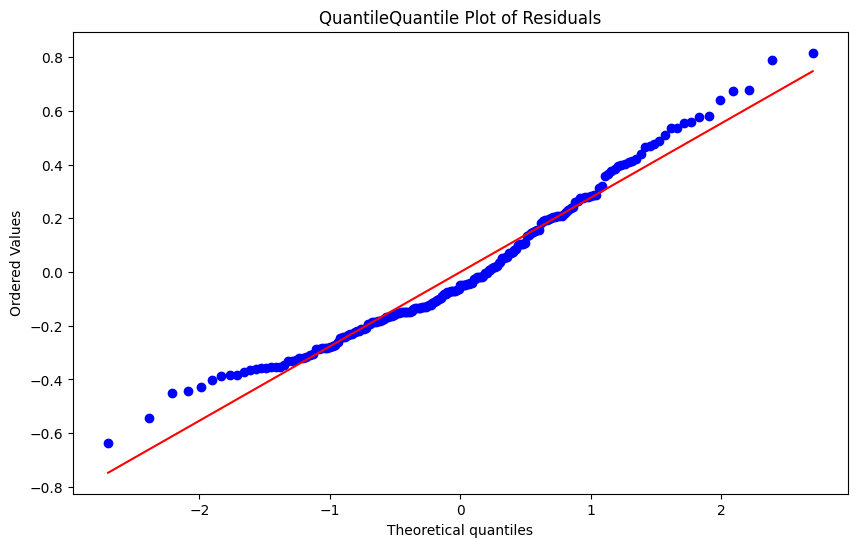

In [61]:
plt.figure(figsize=(10,6))
stats.probplot(residuals, dist="norm", plot=plt, fit = True)
plt.title("QuantileQuantile Plot of Residuals")
plt.show()

#### 3). Now use matplotlib to visualize the relationship between fuel efficiency (city-mpg) and horsepower. Now regress city-mpg on horsepower. Is the regression result consistent with the conclusion you would draw based on the plot?

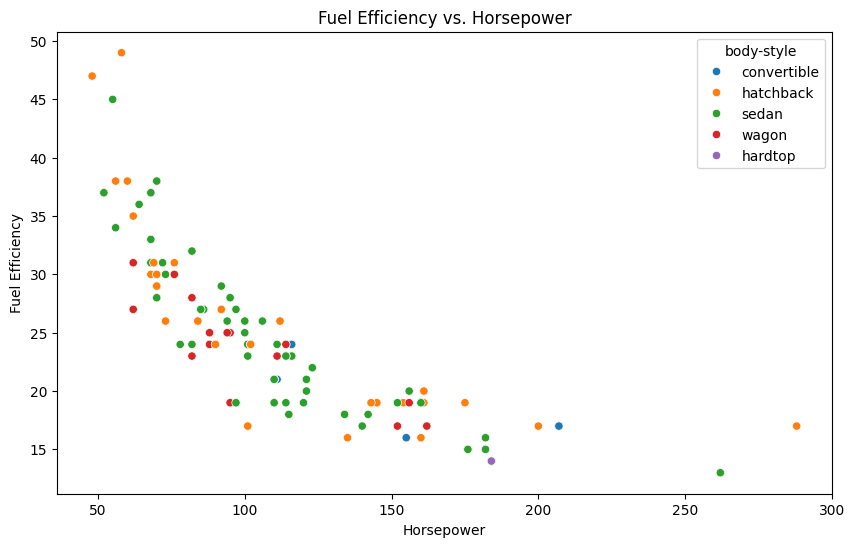

In [9]:
plt.figure(figsize=(10,6))
ax=sns.scatterplot(
    x = "horsepower",
    y = "city-mpg",
    data = carData,
    color = "blue",
    hue = "body-style")

ax.set(
    xlabel = 'Horsepower',
    ylabel = 'Fuel Efficiency',
    title = "Fuel Efficiency vs. Horsepower");

In [10]:
efficiency = carData["city-mpg"]

regressionFuel = sm.OLS(efficiency, horsepower).fit()
print(regressionFuel.summary())

                            OLS Regression Results                            
Dep. Variable:               city-mpg   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     366.5
Date:                Sun, 06 Apr 2025   Prob (F-statistic):           3.49e-47
Time:                        18:28:45   Log-Likelihood:                -564.37
No. Observations:                 203   AIC:                             1133.
Df Residuals:                     201   BIC:                             1139.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.1031      0.775     50.482      0.0

Yes, the regression result of a negative horsepower coefficient is consistent with the conclusion you could draw from the graph. As horsepower increases, the general fuel efficiency of a vehicle decreases.

### Question 2: Nonlinear Relations

#### A common concern is that the relationship between a predictive variable (X) and the outcome we are trying to predict (Y) is nonlinear. On the surface, this seems to invalidate linear regressions, such as the Fama-MacBeth regression. However, this is not generally the case. For instance, if Y = f(X) + noise, where f(.) is not linear in X, simply define a transformation of X as, generally, Z = a + bf(X). Now, it is clear that Y = a1 + b1*Z, for constants a, a1, b, and b1. In other words, one could include squared values of X in the regression, perhaps max(0,X), etc. We will see this in action for the case of Issuance (lnIssue). This is the average amount of stock issuance in the last 36 months, normalized by market equity. Generally, firms that issue a lot of equity have low returns going forward.

#### 1). Construct decile sorts (10 portfolios) as in the class notes, but now based on the issuance variable lnIssue. Give the average return to each decile portfolio, valueweighting stocks within each portfolio each year, equal-weighting across years. 

In [11]:
returnData = pd.read_csv('StockRetAcct_DT.csv')
returnData = returnData[returnData["lnIssue"].notna()]
returnData

,Unnamed: 0,FirmID,year,lnAnnRet,lnRf,MEwt,lnIssue,lnMom,lnME,lnProf,lnEP,lnInv,lnLever,lnROE,rv,lnBM,ff_ind
0,1,6,1980,0.363631,0.078944,0.000281,0.031344,0.075355,12.581472,0.201767,0.146411,0.093626,0.696001,0.095294,0.084134,0.633391,3.0
1,2,6,1981,-0.290409,0.130199,0.000321,0.044213,0.512652,12.907996,0.215661,0.102555,0.087242,0.709843,0.082180,0.056381,0.356723,3.0
2,3,6,1982,0.186630,0.130703,0.000266,-0.068195,-0.220505,12.557775,0.184087,0.119548,0.111663,0.730972,0.079516,0.062072,0.779405,3.0
3,4,6,1983,0.489819,0.089830,0.000170,-0.071780,0.046218,12.561954,0.165531,0.115924,-0.033117,0.710885,0.055374,0.076955,0.702113,3.0
4,5,10,1991,-0.508005,0.061216,0.000033,0.115204,1.341053,11.565831,0.239788,0.023147,0.300051,0.418764,0.146828,0.374368,-2.160942,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70749,70750,20308,2013,0.077438,0.001553,0.000222,0.506999,0.356750,15.224147,0.731743,0.059418,0.032970,0.264473,0.545916,0.024212,-2.733524,11.0
70750,70751,20308,2014,0.165333,0.001175,0.000184,-0.046533,0.286393,15.253713,0.731044,0.038293,0.264798,0.392407,0.578908,0.055899,-2.638935,11.0
70753,70754,20314,2012,1.232889,0.002083,0.000210,0.215003,-0.080371,15.008085,-1.264313,-0.089005,0.614060,1.158263,-0.700480,0.251214,-2.664909,2.0
70754,70755,20314,2013,0.804701,0.001553,0.000708,0.260489,1.104453,16.383282,-1.163863,-0.108056,0.445773,2.189972,-1.182673,0.220699,-3.357340,2.0


C:\Users\Pranay Kumar\AppData\Local\Temp\ipykernel_12360\3582499843.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  annualReturn = returnData.groupby('deciles')['lnAnnRet'].mean()


[Text(0.5, 1.0, 'LnIssue vs LnAnnualReturns')]

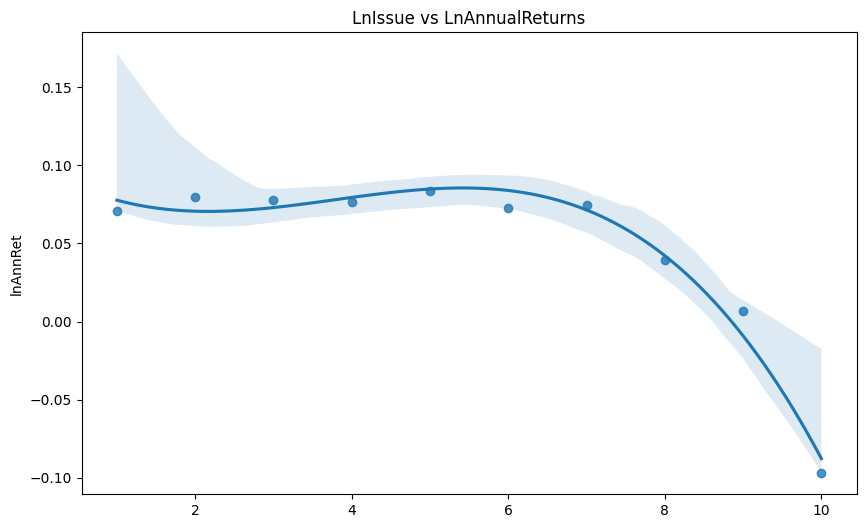

In [12]:
returnData['deciles']=pd.qcut(returnData['lnIssue'], 10, labels=np.arange(1, 11, 1))
annualReturn = returnData.groupby('deciles')['lnAnnRet'].mean()

plt.figure(figsize=(10,6))
ax=sns.regplot(x=np.arange(1,11),y=annualReturn,
fit_reg=True,order=3)
ax.set(title = "LnIssue vs LnAnnualReturns")

#### 2). Plot the average return to these 10 portfolios, similar to what we did in the Topic 1(ef) notes. Discuss whether the pattern seems linear or not. 

#### 3). Since most of the 'action' is in the extreme portfolios, consider a model where expected returns to stocks is linear in a transformed issuance-characteristic that takes three values: -1 if the stock's issuance is in Decile 1, 1 if the stock's issuance is in decile 10, and 0 otherwise. 

### Question 3: Double-sorts and functional forms

#### Create independent quintile sorts based on book-to-market (lnBM) and size (lnME). That is create a quintile variable by year for book-to-market and then create a quintile variable by year for size.

C:\Users\Pranay Kumar\AppData\Local\Temp\ipykernel_12360\2494618892.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  annualReturn = returnData.groupby('quintineBook')['lnAnnRet'].mean()
d:\myenv\Lib\site-packages\seaborn\regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
d:\myenv\Lib\site-packages\seaborn\regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
d:\myenv\Lib\site-packages\seaborn\regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
d:\myenv\Lib\site-packages\seaborn\regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
d:\

[Text(0.5, 1.0, 'lnBM vs LnAnnualReturns')]

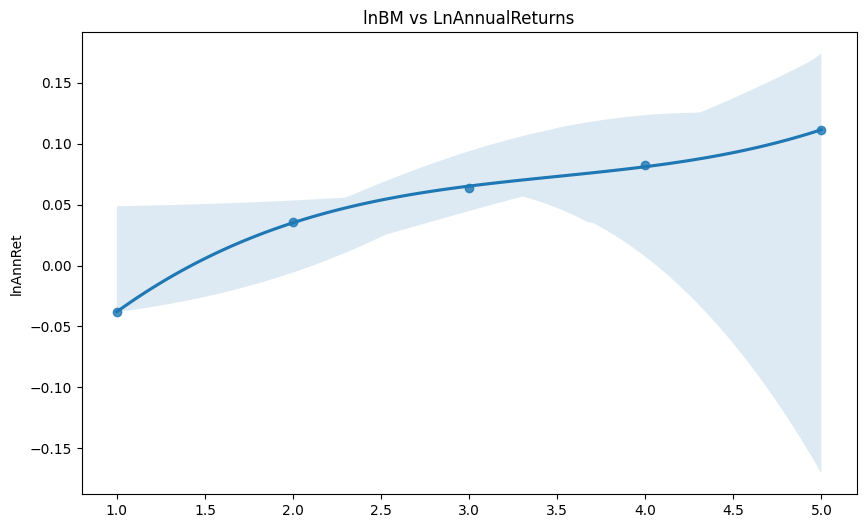

In [15]:
returnData['quintineBook']=pd.qcut(returnData['lnBM'], 5, labels=np.arange(1, 6, 1))
annualReturn = returnData.groupby('quintineBook')['lnAnnRet'].mean()

plt.figure(figsize=(10,6))
ax=sns.regplot(x=np.arange(1,6),y=annualReturn,
fit_reg=True,order=3)
ax.set(title = "lnBM vs LnAnnualReturns")